In [204]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [336]:
#Loading data 
df = pd.read_csv('hmeq.csv')

# Exploring data

In [337]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [338]:
df.shape

(5960, 13)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [340]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [341]:
df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.048219,-0.029954,-0.060238,0.276081,0.354107,-0.170499,0.174980,-0.004157,0.199835
LOAN,-0.075099,1.000000,0.228595,0.335393,0.105728,-0.001302,-0.035144,0.088540,0.044487,0.072631,0.084735
MORTDUE,-0.048219,0.228595,1.000000,0.875666,-0.088480,-0.049516,-0.001044,0.140047,0.031392,0.323631,0.154939
VALUE,-0.029954,0.335393,0.875666,1.000000,0.007759,-0.048689,-0.014103,0.171238,-0.004398,0.269149,0.132174
YOJ,-0.060238,0.105728,-0.088480,0.007759,1.000000,-0.065879,0.038153,0.201718,-0.071627,0.024838,-0.055891
DEROG,0.276081,-0.001302,-0.049516,-0.048689,-0.065879,1.000000,0.211832,-0.083047,0.173934,0.061884,0.017065
DELINQ,0.354107,-0.035144,-0.001044,-0.014103,0.038153,0.211832,1.000000,0.022488,0.067812,0.164639,0.052364
CLAGE,-0.170499,0.088540,0.140047,0.171238,0.201718,-0.083047,0.022488,1.000000,-0.116935,0.237987,-0.046477
NINQ,0.174980,0.044487,0.031392,-0.004398,-0.071627,0.173934,0.067812,-0.116935,1.000000,0.088389,0.141344
CLNO,-0.004157,0.072631,0.323631,0.269149,0.024838,0.061884,0.164639,0.237987,0.088389,1.000000,0.185539


<AxesSubplot:>

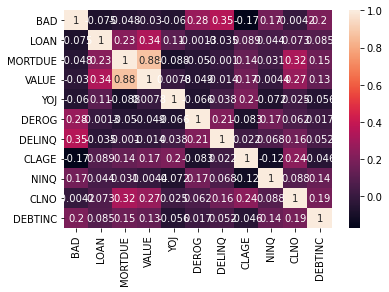

In [342]:
sns.heatmap(df.corr(), annot=True)


In [212]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


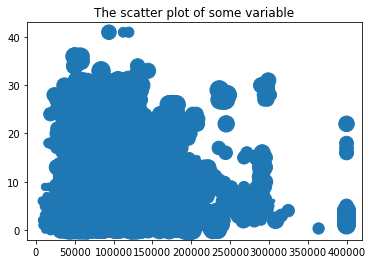

In [333]:
# Scatter plot of the data 
plt.scatter(df['VALUE'],df['YOJ'],df['CLAGE'])
plt.title("The scatter plot of some variable")
plt.show()

### The PairPlot gives a lot of information in one plot.

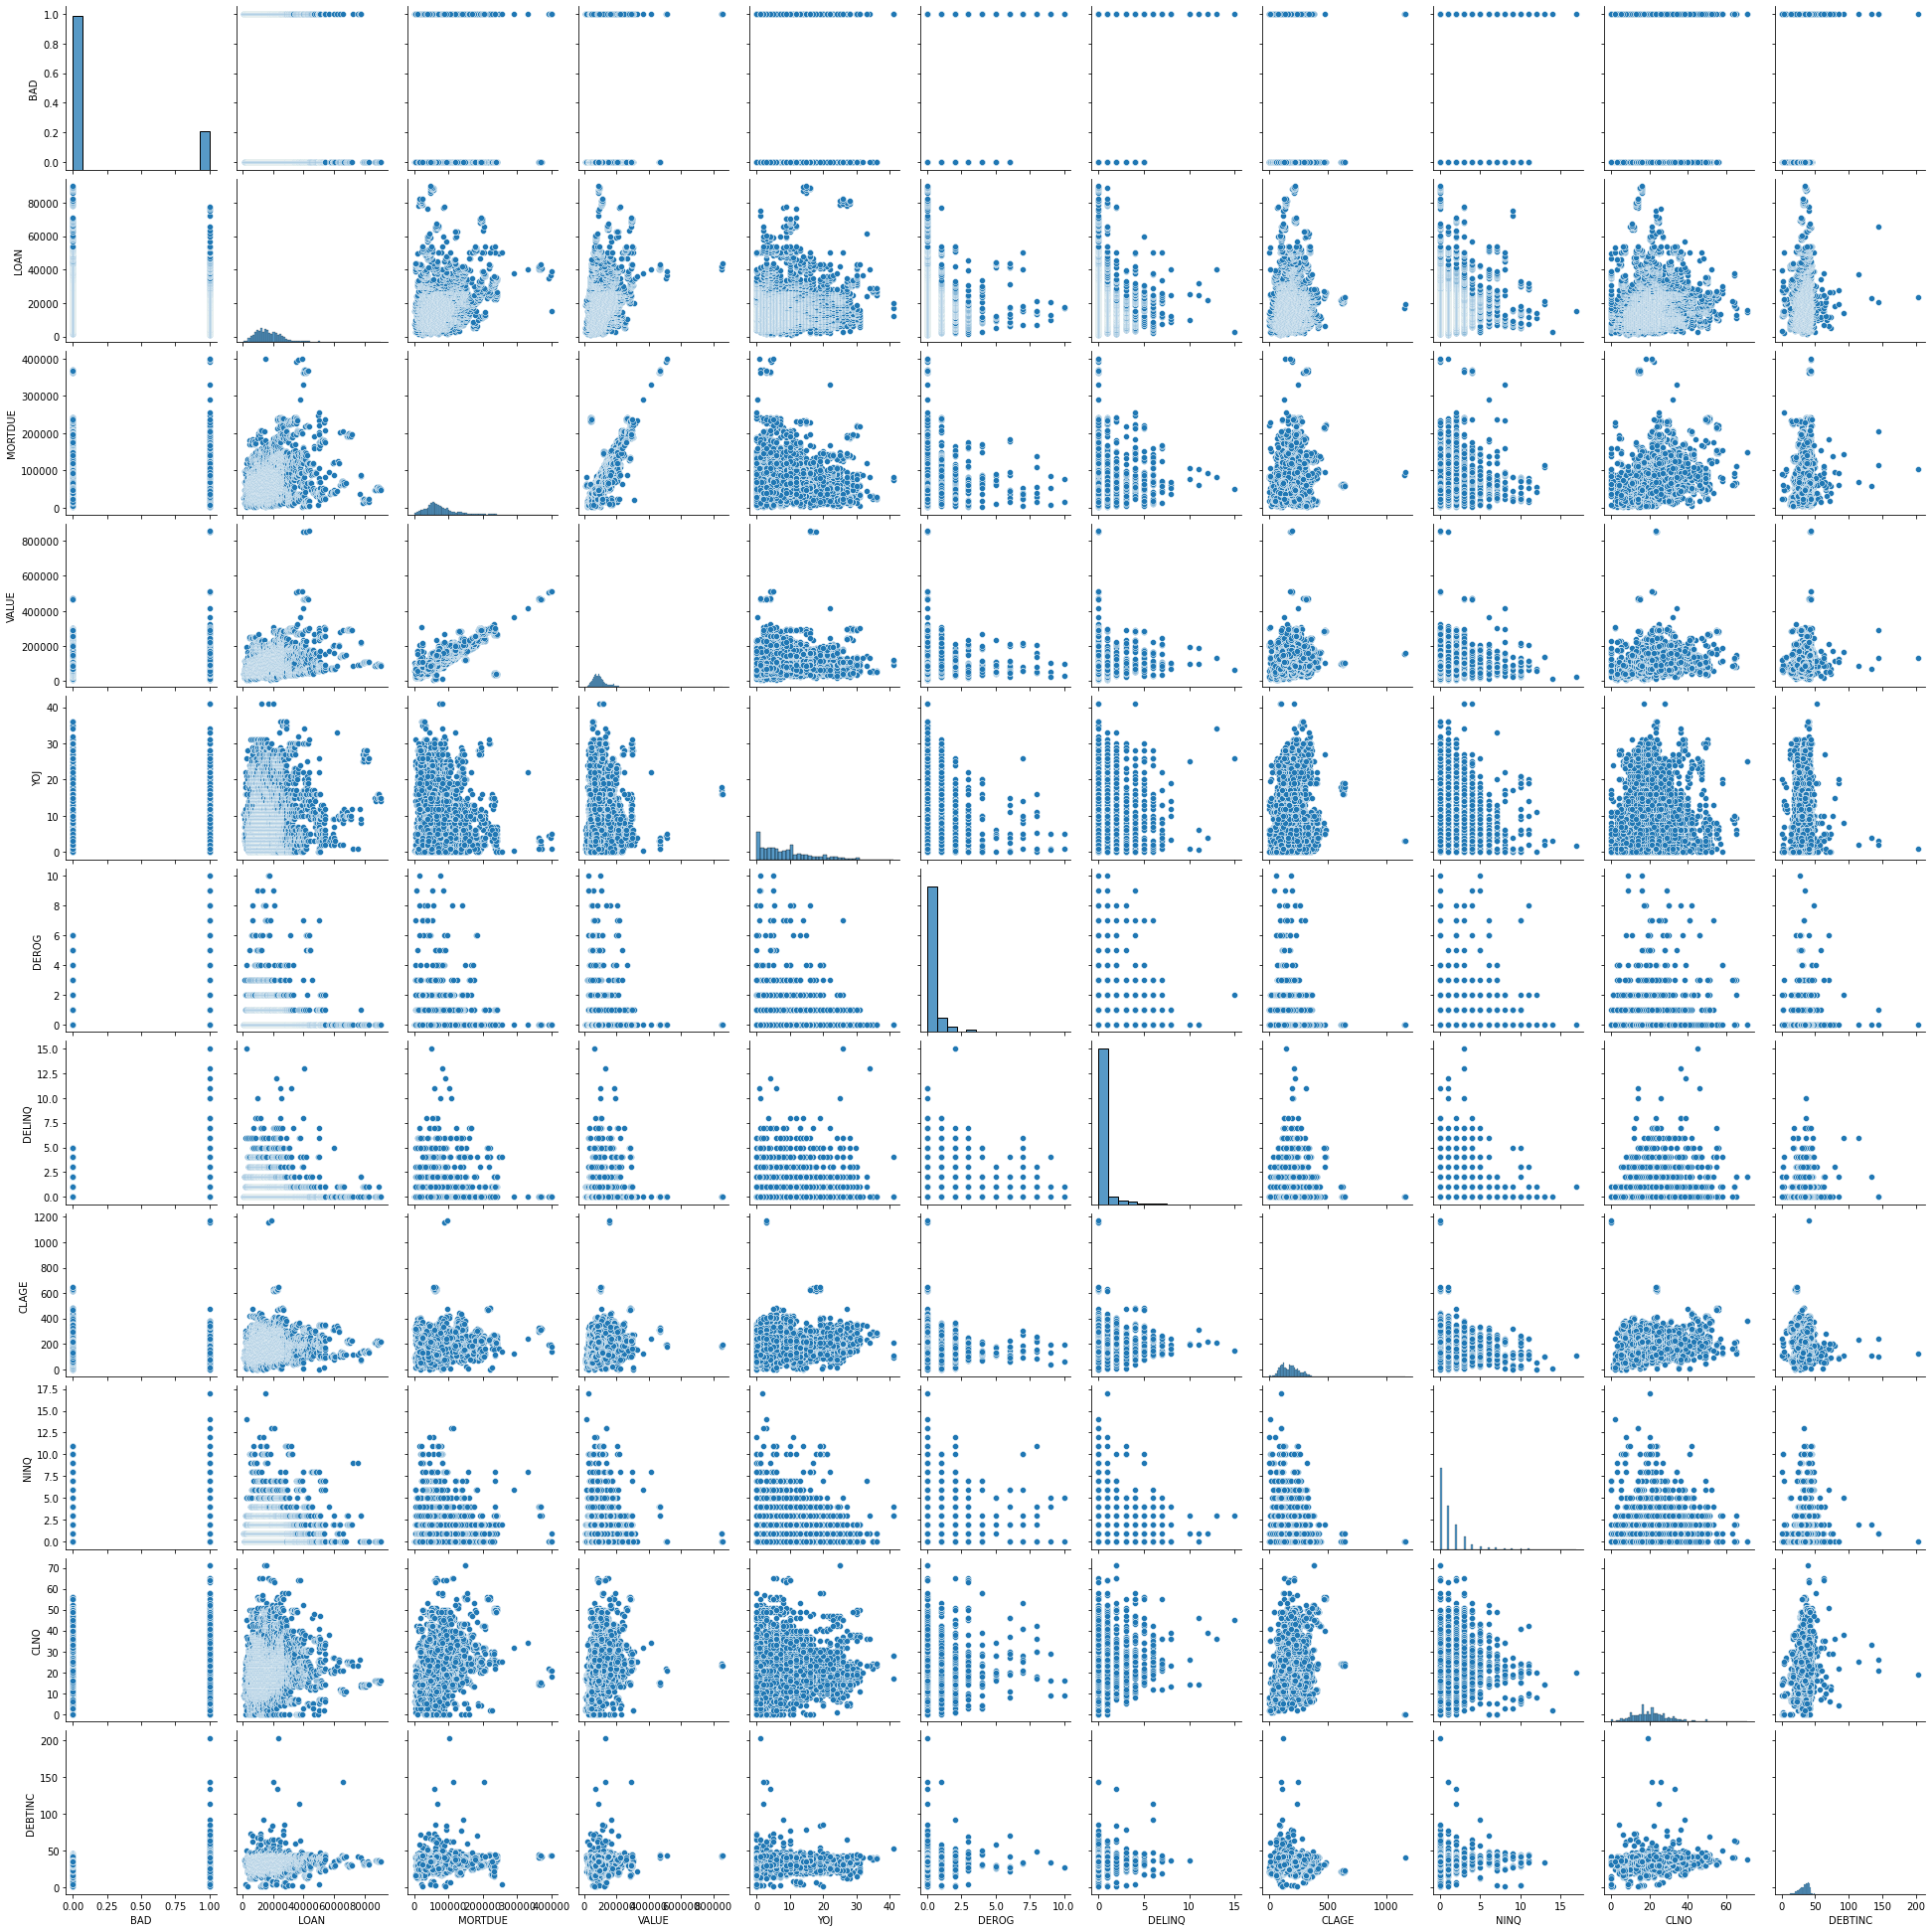

In [343]:
sns.pairplot(df.drop(columns=['REASON','JOB']))

In [344]:
df['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

<AxesSubplot:ylabel='BAD'>

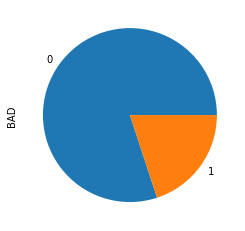

In [345]:
df['BAD'].value_counts().plot(kind='pie')

In [346]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [347]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

<AxesSubplot:ylabel='Frequency'>

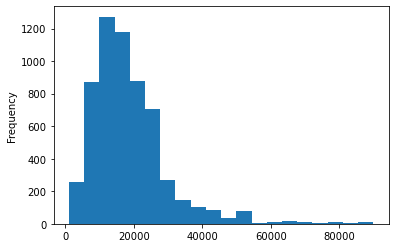

In [348]:
df['LOAN'].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

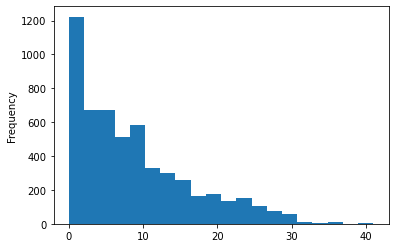

In [349]:
df['YOJ'].plot.hist(bins=20)
## This is very skewed. It would be better if we modify this variable to decrease the skewness.

<AxesSubplot:ylabel='Frequency'>

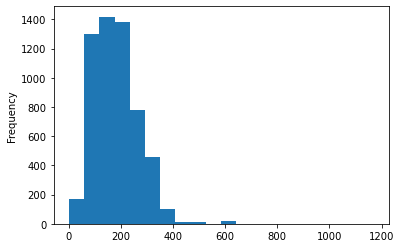

In [350]:
df['CLAGE'].plot.hist(bins=20)

In [351]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [352]:
df['DELINQ'].value_counts()

0.0     4179
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
11.0       2
10.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [353]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [354]:
#For imputing the missing values we can think of few ideas like :
#In case of nominal features, replacing them with the majority class
#In case of numeric variables like DEROG and DELINQ,most of the cases are 0.We can replace these with majority class.
#In case of other numerical inputs , we can replace them by median or mean without modifying the much.In this notebook I am going to replace them by mean of the respective column.

In [355]:
df['JOB'].fillna(value= 'Other', inplace=True)

In [356]:
df['REASON'].fillna(value='DebtCon', inplace= True)

In [357]:
df['DELINQ'].fillna(value=0, inplace = True)

In [358]:
df['DEROG'].fillna(value=0, inplace = True)

In [359]:
#df.fillna(value=df.mean, inplace = True)

In [360]:
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:# If the column is numerical
        df[column].fillna(df[column].mean(), inplace = True)
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [361]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Modeling 

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [363]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,DebtCon,Other,16.000000,0.0,0.0,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.0000,92937.000000,DebtCon,Other,16.000000,0.0,0.0,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.0000,92924.000000,DebtCon,Other,15.000000,0.0,0.0,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.0000,91861.000000,DebtCon,Other,14.000000,0.0,0.0,213.892709,0.000000,16.000000,34.340882


In [364]:
X=df.drop(columns=['BAD','REASON','JOB'])


In [365]:
Y=df['BAD']
Y

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

In [366]:
# Standardizing the features
#x = StandardScaler().fit_transform(X)

In [367]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y ,test_size = 0.33, random_state=0)
X_train

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
3814,20000,116932.0,138072.0,19.000000,0.0,0.0,171.466667,2.000000,23.0,33.779915
5360,30500,108736.0,147531.0,13.000000,0.0,0.0,228.610359,1.000000,40.0,43.122762
4279,22300,59809.0,90883.0,2.000000,0.0,0.0,161.402906,1.000000,22.0,36.174251
2969,16300,96431.0,161284.0,8.922268,0.0,0.0,256.371932,1.186055,23.0,39.077814
5550,35200,239987.0,43028.0,2.000000,0.0,1.0,210.189005,3.000000,49.0,41.336627
...,...,...,...,...,...,...,...,...,...,...
4931,26000,222681.0,286283.0,6.000000,0.0,4.0,485.945358,1.186055,55.0,33.239355
3264,17400,113890.0,135146.0,16.000000,0.0,0.0,174.101460,1.000000,17.0,37.633549
1653,11800,57760.0,65535.0,11.000000,0.0,0.0,108.469400,1.000000,18.0,32.783484
2607,15000,79000.0,108000.0,0.400000,0.0,0.0,385.500000,3.000000,31.0,33.779915


In [368]:
log1 = LogisticRegression()

In [369]:
log1.fit(X_train, Y_train)

LogisticRegression()

In [370]:
from sklearn.metrics import accuracy_score

y_pred = log1.predict(X_test)
accuracy_score(y_pred, Y_test)

0.8012201321809863

In [371]:
y_pred = log1.predict(X_test)

In [372]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [373]:
print('coefficient')
print(log1.coef_)

coefficient
[[-1.89e-05 -4.61e-06  3.06e-06 -2.45e-04  5.24e-05  1.05e-04 -5.77e-03
   6.05e-05 -2.05e-04 -2.83e-04]]


In [374]:
print('intercept')
print(log1.intercept_)

intercept
[-1.66e-05]


In [375]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [376]:
a1= accuracy_score(y_pred, Y_test)
f1= f1_score(y_pred, Y_test, average='macro')
r1= recall_score(y_pred, Y_test, average='macro')
p1= precision_score(y_pred, Y_test, average='macro')
print('Accuracy', a1)
print('f1_score', f1)
print('Recall', r1)
print('Precision', p1)

Accuracy 0.8012201321809863
f1_score 0.4473341367176075
Recall 0.5676340801086218
Precision 0.5006479358730469


In [377]:
confusion_matrix(y_pred, Y_test)

array([[1575,  389],
       [   2,    1]], dtype=int64)

In [378]:
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

NameError: name 'plot_confusion_matrix' is not defined

<Figure size 432x288 with 0 Axes>

Now we are going to do a decision Tree classifier as a significant advantage of a decision tree is that it forces the consideration of all possible outcomes of a decision and traces each path to a conclusion. It creates a comprehensive analysis of the consequences along each branch and identifies decision nodes that need further analysis.

In [379]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.max_depth = 100
Dtree.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=100)

In [380]:
y_pred1= Dtree.predict(X_test)

In [381]:
a2= accuracy_score(Y_test, y_pred1)
f1= f1_score(Y_test, y_pred1, average = 'macro')
R= recall_score(Y_test, y_pred1, average = 'macro')
P= precision_score(Y_test, y_pred1, average = 'macro')
print('Accuracy', a2)
print('f1_score', f1)
print('Recall', R)
print('Precision', P)

Accuracy 0.8774783934926284
f1_score 0.8024923494205558
Recall 0.7952449474009398
Precision 0.8105441827852171



## Data transformation
We need to transform some variables in order to improve predictability. So, we have transform the whole data set not just training set.
First Capping off the features CLAGE(values >= 600 to 600) , VALUE(values>=400000 to 400000) , MORTDUE(values>=300000 to 300000) and DEBTINC(values >=100 to 100)


In [382]:
df.loc[df['CLAGE']>= 600, 'CLAGE'] = 600
df.loc[df['VALUE']>= 400000, 'VALUE'] = 400000
df.loc[df['MORTDUE']>= 300000, 'MORTDUE']= 300000
df.loc[df['DEBTINC']>= 100, 'DEBTINC'] = 100

In [383]:
# Creating new binary vaiables B_DEROG,B_DELINQ from DEROG,DELINQ

df["B_DEROG"] = (df["DEROG"]>=1)*1
df["B_DELINQ"] = (df["DELINQ"]>=1)*1

In [384]:
df['REASON'].value_counts()

DebtCon    4180
HomeImp    1780
Name: REASON, dtype: int64

In [385]:
df1=pd.get_dummies(df, columns=['REASON','JOB'])

In [386]:
df1

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.000000,9.000000,...,0,0,0,1,0,0,1,0,0,0
1,1,1300,70053.0000,68400.000000,7.000000,0.0,2.0,121.833333,0.000000,14.000000,...,0,1,0,1,0,0,1,0,0,0
2,1,1500,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.000000,10.000000,...,0,0,0,1,0,0,1,0,0,0
3,1,1500,73760.8172,101776.048741,8.922268,0.0,0.0,179.766275,1.186055,21.296096,...,0,0,1,0,0,0,1,0,0,0
4,0,1700,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.000000,14.000000,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0000,90185.000000,16.000000,0.0,0.0,221.808718,0.000000,16.000000,...,0,0,1,0,0,0,1,0,0,0
5956,0,89000,54576.0000,92937.000000,16.000000,0.0,0.0,208.692070,0.000000,15.000000,...,0,0,1,0,0,0,1,0,0,0
5957,0,89200,54045.0000,92924.000000,15.000000,0.0,0.0,212.279697,0.000000,15.000000,...,0,0,1,0,0,0,1,0,0,0
5958,0,89800,50370.0000,91861.000000,14.000000,0.0,0.0,213.892709,0.000000,16.000000,...,0,0,1,0,0,0,1,0,0,0


<AxesSubplot:ylabel='Frequency'>

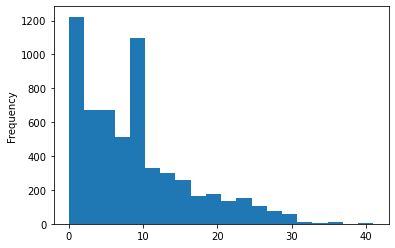

In [387]:
df1['YOJ'].plot.hist(bins=20)

A data transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.that's why we are going to decrease the skewness of 'YOJ'

In [388]:
df1['YOJ'] = df1['YOJ'].apply(lambda x : np.log(1+x))

<AxesSubplot:ylabel='Frequency'>

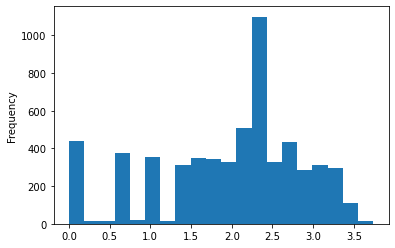

In [389]:
df1['YOJ'].plot.hist(bins=20)

## Feature Selection
As we completed the transformation part, now we move on to Feature Selection.Now we will find out the most import features that are affecting the target variable "BAD" the most.
We will use the following for this purpose :
Pearson correlation factor pearson
chi square test
f_regression
f_classif

In [390]:
df1.corr('pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,B_DEROG,B_DELINQ,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
BAD,1.000000,-0.075099,-0.049420,-0.043711,-0.053066,0.269921,0.346503,-0.173412,0.168851,-0.004067,...,0.261216,0.308153,-0.037517,0.037517,0.032583,-0.073613,0.037949,-0.043561,0.050934,0.046245
LOAN,-0.075099,1.000000,0.214803,0.338749,0.102458,0.006996,-0.028869,0.088875,0.043160,0.071804,...,0.009079,-0.030646,0.151477,-0.151477,0.018769,-0.018060,-0.058067,0.017488,-0.044993,0.158452
MORTDUE,-0.049420,0.214803,1.000000,0.816001,-0.052771,-0.046526,0.002095,0.132928,0.026853,0.314779,...,-0.041471,-0.014568,0.026941,-0.026941,0.076687,-0.066813,-0.259602,0.256575,0.026023,0.107944
VALUE,-0.043711,0.338749,0.816001,1.000000,0.023878,-0.041263,-0.000578,0.178638,-0.004635,0.283654,...,-0.040482,-0.034988,0.012308,-0.012308,0.051960,-0.058463,-0.288132,0.282653,0.018250,0.163060
YOJ,-0.053066,0.102458,-0.052771,0.023878,1.000000,-0.050552,0.023185,0.145111,-0.052621,0.042928,...,-0.058295,0.023075,-0.060306,0.060306,0.029926,-0.066539,0.023324,0.024664,-0.041243,-0.010586
DEROG,0.269921,0.006996,-0.046526,-0.041263,-0.050552,1.000000,0.171286,-0.081231,0.146700,0.050727,...,0.755021,0.171622,0.008406,-0.008406,0.031342,-0.049223,0.034537,-0.033939,0.030659,0.000836
DELINQ,0.346503,-0.028869,0.002095,-0.000578,0.023185,0.171286,1.000000,0.026713,0.057212,0.159378,...,0.188767,0.748356,-0.004024,0.004024,0.059350,0.005268,-0.044718,-0.002911,-0.016502,0.021694
CLAGE,-0.173412,0.088875,0.132928,0.178638,0.145111,-0.081231,0.026713,1.000000,-0.110857,0.242213,...,-0.083332,0.007707,-0.050670,0.050670,-0.022948,0.000032,-0.080490,0.112309,0.026502,-0.010872
NINQ,0.168851,0.043160,0.026853,-0.004635,-0.052621,0.146700,0.057212,-0.110857,1.000000,0.085148,...,0.152237,0.059767,0.115992,-0.115992,0.069826,-0.063735,0.054470,-0.061553,-0.035677,0.016229
CLNO,-0.004067,0.071804,0.314779,0.283654,0.042928,0.050727,0.159378,0.242213,0.085148,1.000000,...,0.035880,0.154674,0.107224,-0.107224,0.060210,-0.004549,-0.197815,0.165109,0.049185,0.031325


In [391]:
#Gathering some variable more correlated with the target variable;
feat1=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN"]


In [392]:
x1 = df1[feat1]
y1= df1['BAD']

In [393]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1, test_size=0.33, random_state=1)

In [394]:
log2=LogisticRegression()

In [395]:
log2.fit(x1_train,y1_train)

LogisticRegression()

In [396]:
y_pred2=log2.predict(x1_test)

In [397]:
a3= accuracy_score(y1_test, y_pred2)
f1= f1_score(y1_test, y_pred2, average = 'macro')
R= recall_score(y1_test, y_pred2, average = 'macro')
P= precision_score(y1_test, y_pred2, average = 'macro')
print('Accuracy', a3)
print('f1_score', f1)
print('Recall', R)
print('Precision', P)

Accuracy 0.8235892221657346
f1_score 0.6392929486701832
Recall 0.6163986392453997
Precision 0.7626557715587837


### Let's try with RandomForestClassifier

In [398]:
from sklearn.ensemble import RandomForestClassifier

In [399]:
Rf = RandomForestClassifier(n_estimators = 100)

In [400]:
Rf.fit(x1_train, y1_train)

RandomForestClassifier()

In [401]:
y_pred3=Rf.predict(x1_test)

In [402]:
a4= accuracy_score(y1_test, y_pred3)
f1= f1_score(y1_test, y_pred3, average = 'macro')
R= recall_score(y1_test, y_pred3, average = 'macro')
P= precision_score(y1_test, y_pred3, average = 'macro')
print('Accuracy', a4)
print('f1_score', f1)
print('Recall', R)
print('Precision', P)

Accuracy 0.9034062023385867
f1_score 0.8374436731214225
Recall 0.8079259537431797
Precision 0.8819250369883281


In [403]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=200, max_depth=500, random_state=0)
scores = cross_val_score(clf, x1_train, y1_train, cv=5)
scores.mean()

0.8978187019488647

In [404]:
clf.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=500, n_estimators=200, random_state=0)

In [405]:
y_pred3=clf.predict(x1_test)

In [406]:
a4= accuracy_score(y1_test, y_pred3)
f1= f1_score(y1_test, y_pred3, average = 'macro')
R= recall_score(y1_test, y_pred3, average = 'macro')
P= precision_score(y1_test, y_pred3, average = 'macro')
print('Accuracy', a4)
print('f1_score', f1)
print('Recall', R)
print('Precision', P)

Accuracy 0.9023894255210981
f1_score 0.8353733810390643
Recall 0.8054628995559876
Precision 0.8808871732518012


###  As we notice from the metrics of the evaluation of our models, the results looks better with Random_forest_classifier, as the recall is 0.8 which mean that we are decreasing the false negative.

In [416]:
from sklearn.model_selection import train_test_split, GridSearchCV

gridsearch = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid={
                              'n_estimators': [50, 100, 250, 300],
                              'max_depth': [None, 100, 200, 300, 400]
                          },
                          cv=5,
                          return_train_score=False, 
                         scoring = "accuracy", verbose=2)
gridsearch.fit(X_train, Y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.3s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.7s
[CV] END ...................max_depth=None, n_estimators=250; total time=   1.8s
[CV] END ...................max_depth=None, n_e

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,
1,1.277771,0.021746,0.043312,0.005855,400,300,"{'max_depth': 400, 'n_estimators': 300}",0.904881,0.911139,0.901126,0.938596,0.911028,0.913354,0.013182
2,1.421921,0.312118,0.047225,0.010293,None,250,"{'max_depth': None, 'n_estimators': 250}",0.906133,0.906133,0.907384,0.929825,0.912281,0.912351,0.009026
3,0.438586,0.010730,0.014286,0.002630,300,100,"{'max_depth': 300, 'n_estimators': 100}",0.906133,0.904881,0.902378,0.934837,0.912281,0.912102,0.011826
4,0.227959,0.005397,0.005942,0.003101,300,50,"{'max_depth': 300, 'n_estimators': 50}",0.903630,0.901126,0.904881,0.933584,0.916040,0.911852,0.012009
5,1.323283,0.058451,0.048258,0.001232,100,300,"{'max_depth': 100, 'n_estimators': 300}",0.904881,0.901126,0.902378,0.931078,0.916040,0.911101,0.011294
6,1.103876,0.023824,0.041094,0.005851,100,250,"{'max_depth': 100, 'n_estimators': 250}",0.907384,0.906133,0.899875,0.933584,0.907268,0.910849,0.011699
7,1.296613,0.011505,0.040256,0.005043,200,300,"{'max_depth': 200, 'n_estimators': 300}",0.904881,0.899875,0.901126,0.934837,0.911028,0.910349,0.012844
8,1.282204,0.015872,0.044086,0.006104,300,300,"{'max_depth': 300, 'n_estimators': 300}",0.906133,0.906133,0.899875,0.928571,0.908521,0.909847,0.009792
9,1.068636,0.011468,0.033770,0.003306,400,250,"{'max_depth': 400, 'n_estimators': 250}",0.899875,0.907384,0.897372,0.933584,0.909774,0.909598,0.012840


In [426]:
rf=gridsearch.best_estimator_
rf

RandomForestClassifier(max_depth=400, n_estimators=300)

In [429]:
best_model=rf.fit(X_train, Y_train)

In [436]:
y_pred = best_model.predict(X_test)
a5= accuracy_score(Y_test, y_pred)
f1= f1_score(Y_test, y_pred, average = 'weighted')
R= recall_score(Y_test, y_pred, average = 'weighted')
P= precision_score(Y_test, y_pred, average = 'weighted')
print('Accuracy', a5)
print('f1_score', f1)
print('Recall', R)
print('Precision', P)

Accuracy 0.9115404168784952
f1_score 0.9081400574619446
Recall 0.9115404168784952
Precision 0.9083935867743697


#### After doing a gridsearch to look for the best combination of estimator that will predict better, it looks that the prediction of our model improved a little bit.

In [446]:
a = confusion_matrix(y_pred, Y_test)
a

array([[1525,  122],
       [  52,  268]], dtype=int64)

<AxesSubplot:>

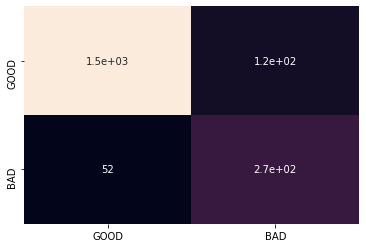

In [449]:
sns.heatmap(a, annot=True, yticklabels=['GOOD', 'BAD'], xticklabels=['GOOD', 'BAD'], cbar = False)